# Submission Code

In [1]:
# install the required packages first
require(jsonlite)
require(httr)
require(data.table)

get_token <- function(username, password, url_site){
    
    post_body = list(username=username,password=password)
    post_url_string = paste0(url_site,'/token/')
    result = POST(post_url_string, body = post_body)

    # error handling (wrong credentials)
    if(result$status_code==400){
        print('Check your credentials')
        return(0)
    }
    else if (result$status_code==201){
        output = content(result)
        token = output$key
    }

    return(token)
}



send_submission <- function(predictions, token, url_site, submit_now=F){
    
    format_check=check_format(predictions)
    if(!format_check){
        return(FALSE)
    }
    
    post_string="list("
    for(i in 1:length(predictions)){
        if(i<length(predictions)){
            post_string=sprintf("%s%s,",post_string,predictions[i])
        } else {
            post_string=sprintf("%s%s)",post_string,predictions[i])
        }
    }
    
    submission = eval(parse(text=post_string))
    json_body = jsonlite::toJSON(submission, auto_unbox = TRUE)
    submission=list(submission=json_body)
    print(submission)

    if(!submit_now){
        print("You did not submit.")
        return(FALSE)      
    }
    

    header = add_headers(c(Authorization=paste('Token',token,sep=' ')))
    post_url_string = paste0(url_site,'/submission/')
    result = POST(post_url_string, header, body=submission)
    
    if (result$status_code==201){
        print("Successfully submitted. Below you can see the details of your submission")
    } else {
        print("Could not submit. Please check the error message below, contact the assistant if needed.")
    }
    
    print(content(result))
    
}

check_format <- function(predictions){
    
    if(all(is.numeric(predictions)) & all(predictions<=1)){
        print("Format OK")
        return(TRUE)
    } else {
        print("Wrong format")
        return(FALSE)
    }
    
}

# this part is main code
subm_url = 'http://46.101.121.83'

u_name = "Miners"
p_word = "NsY7hhlU9zjl8DH3"
submit_now = TRUE

username = u_name
password = p_word

token = get_token(username=u_name, password=p_word, url=subm_url)
# this part is where you need to provide your prediction method/function or set of R codes


Loading required package: jsonlite
Loading required package: httr
Warning message:
"package 'httr' was built under R version 3.6.3"Loading required package: data.table


# Customized Metric

In [ ]:
madSummary <- function (data,
lev = NULL,
model = NULL) {
out <- mad(data$obs - data$pred,
na.rm = TRUE)
names(out) <- "MAD"
out
}
robustControl <- trainControl(summaryFunction = madSummary)
marsGrid <- expand.grid(degree = 1, nprune = (1:10) * 2)
earthFit <- train(medv ~ .,
data = BostonHousing,
method = "earth",
tuneGrid = marsGrid,
metric = "MAD",
maximize = FALSE,
trControl = robustControl)

# Model

In [2]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(Information)
library(FactoMineR)
library(caTools)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
<U+221A> tibble  3.0.4     <U+221A> purrr   0.3.2
<U+221A> tidyr   1.1.2     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------

In [31]:
TrainData<-fread("IE582_Fall20_ProjectTrain.csv")

TrainData=as.data.table(TrainData)

In [32]:
TrainData=TrainData[,c(-37,-50,-52)]

In [4]:
# TrainData[, x1:=as.numeric(x1>mean(x1))]
# TrainData[, x5:=as.numeric(x5>mean(x5))]
# TrainData[, x6:=as.numeric(x6>mean(x6))]
# TrainData[, x7:=as.numeric(x7>mean(x7))]
# TrainData[, x8:=as.numeric(x8>mean(x8))]
# TrainData[, x9:=as.numeric(x9>mean(x9))]
# TrainData[, x10:=as.numeric(x10>mean(x10))]
# TrainData[, x11:=as.numeric(x11>mean(x11))]
# TrainData[, x14:=as.numeric(x14>mean(x14))]
# TrainData[, x27:=as.numeric(x27>mean(x27))]
# TrainData[, x30:=as.numeric(x30>mean(x30))]
# TrainData[, x32:=as.numeric(x32>mean(x32))]
# TrainData[, x36:=as.numeric(x36>mean(x36))]

In [5]:
spl=sample.split(TrainData$y, SplitRatio = 0.8)
train=subset(TrainData,spl==TRUE)
test=subset(TrainData,spl==FALSE)
str(train)

Classes 'data.table' and 'data.frame':	1659 obs. of  59 variables:
 $ x1 : int  27 30 37 29 33 33 29 27 28 27 ...
 $ x2 : int  1 0 0 0 1 0 1 1 1 0 ...
 $ x3 : int  1 1 1 1 1 0 0 1 1 0 ...
 $ x4 : int  1 1 1 1 0 1 1 1 1 1 ...
 $ x5 : int  18 18 1 14 2 5 16 13 0 11 ...
 $ x6 : int  3 13 3 9 15 5 1 4 0 17 ...
 $ x7 : int  1 3 14 3 12 12 2 17 2 4 ...
 $ x8 : int  28 19 33 29 39 26 24 34 40 23 ...
 $ x9 : num  119.9 86.7 174 8.8 55 ...
 $ x10: num  154 133 128 127 188 ...
 $ x11: num  121.4 129 100.2 55.5 156.6 ...
 $ x12: int  1 0 0 1 1 0 0 0 0 1 ...
 $ x13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x14: int  404 303 454 383 404 404 404 30 202 404 ...
 $ x15: int  1 1 1 1 0 1 0 1 1 0 ...
 $ x16: int  0 0 0 1 0 0 0 0 1 0 ...
 $ x17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x18: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x19: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x20: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x21: int  0 0 0 0 0 0 0 0 0 0 ...
 $ x22: int  0 1 0 0 0 0 0 0 0 0 ...
 $ x23: int  1 1 1 0 1 0 1 0 0 1 ...
 $ x24: int  0 0 0 1 

### Performance Function

In [6]:
perf_dt=function(type,actual,forecast){
    name=type
    n=length(actual)
    error=actual-forecast
    mean=mean(actual)
    sd=sd(actual)
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=sqrt(sum(error^2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    l=data.frame(name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE)
    return(l)
}

# Prediction & Control with Train Dataset

In [5]:
library(caret)
library(e1071)

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

The following object is masked from 'package:httr':

    progress

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [6]:
fitControl=trainControl(method = "repeatedcv",
                           number = 10, classProbs = TRUE,summaryFunction = twoClassSummary) 

In [7]:
gbmGrid=expand.grid(interaction.depth = c(5,6,7), 
                        n.trees = (4:8)*30, 
                        shrinkage = c(0.1, 0.3, 0.5),
                        n.minobsinnode = c( 15, 20))

In [ ]:
gbm_fit=train(as.factor(y) ~ .-x57, data = train, 
                 method = "gbm", 
                 trControl = fitControl,  
                 tuneGrid = gbmGrid,
                # weights = model_weights,
                 metric="ROC",
                 verbose=F)

gbm_fit
plot(gbm_fit)

Warning message in train.default(x, y, weights = w, ...):
"The metric "ROC" was not in the result set. Accuracy will be used instead."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernou

"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 55: x57 has no variation."Warning message in (function (x, y, offset = NULL, mis

"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, mis

"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 37: x37 has no variation."Warning message in (function (x, y, offset = NULL, mis

In [ ]:
predictions_train=predict(gbm_fit,test)

In [ ]:
confusionMatrix(data = as.factor(predictions_train), reference = as.factor(test$y), mode = "prec_recall")

In [ ]:
perf_dt("Performance Measure", as.numeric(predictions_train), as.numeric(test$y))

In [ ]:
table(test$y,predictions_train)

# Final Model

In [29]:
final_test=read.csv("IE582_Fall20_ProjectTest.csv")

final_test<-final_test[,-c(37,50,52)]
final_test=as.data.table(final_test)

In [9]:
# final_test[, x1:=as.numeric(x1>mean(x1))]
# final_test[, x5:=as.numeric(x5>mean(x5))]
# final_test[, x6:=as.numeric(x6>mean(x6))]
# final_test[, x7:=as.numeric(x7>mean(x7))]
# final_test[, x8:=as.numeric(x8>mean(x8))]
# final_test[, x9:=as.numeric(x9>mean(x9))]
# final_test[, x10:=as.numeric(x10>mean(x10))]
# final_test[, x11:=as.numeric(x11>mean(x11))]
# final_test[, x14:=as.numeric(x14>mean(x14))]
# final_test[, x27:=as.numeric(x27>mean(x27))]
# final_test[, x30:=as.numeric(x30>mean(x30))]
# final_test[, x32:=as.numeric(x32>mean(x32))]
# final_test[, x36:=as.numeric(x36>mean(x36))]

Stochastic Gradient Boosting 

2074 samples
  57 predictor
   2 classes: 'a', 'b' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1867, 1867, 1867, 1867, 1867, 1866, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.minobsinnode  n.trees  ROC        Sens     
  0.1        5                  15              120      0.8806498  0.9265270
  0.1        5                  15              150      0.8789771  0.9220398
  0.1        5                  15              180      0.8793596  0.9194880
  0.1        5                  15              210      0.8762145  0.9175649
  0.1        5                  15              240      0.8751970  0.9169402
  0.1        5                  20              120      0.8804608  0.9354728
  0.1        5                  20              150      0.8795353  0.9322799
  0.1        5                  20              180      0.8795836  0.9303446
  0.1        5             

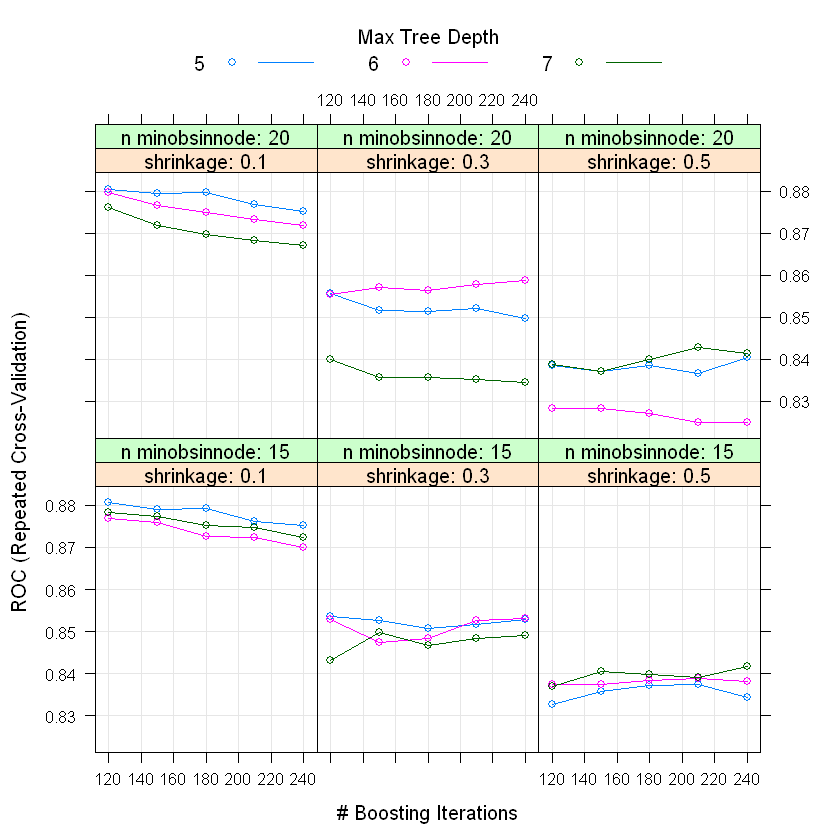

In [34]:
gbm_fit=train(y ~ ., data = TrainData, 
                 method = "gbm", 
                 trControl = fitControl,  
                 tuneGrid = gbmGrid,
                 metric="ROC",
                 verbose=F)

gbm_fit
plot(gbm_fit)

In [35]:
predictions=predict(gbm_fit,final_test)

In [19]:
final_prediction=as.numeric(predictions)-1

# Random Forest

In [ ]:
library(randomForest)

In [ ]:
random_forest=randomForest(as.factor(y)~.,data=train,ntree=500,nodesize=20)
random_forest

In [ ]:
varImpPlot(random_forest)

In [ ]:
PredictRandomForest=predict(random_forest,newdata=test)
table(test$y,PredictRandomForest)

In [ ]:
confusionMatrix(data = PredictRandomForest, reference = as.factor(test$y), mode = "prec_recall")

In [ ]:
perf_dt("Random Forest",as.numeric(test$y),as.numeric(PredictRandomForest))

In [ ]:
random_forest_final=randomForest(as.factor(y)~.,data=TrainData,ntree=500,nodesize=20)
random_forest_final

In [ ]:
predictions_rf=predict(random_forest_final,final_test)
predictions_rf_final=as.numeric(predictions_rf)-1

In [ ]:
table(final_prediction,predictions_rf_final)

# Penalized Version

In [ ]:
library(rpart)
library(GGally, quietly=TRUE)
library(rattle)

In [ ]:
PenaltyMatrix = matrix(c(0,1.5,5,0), byrow=TRUE, nrow=2)
PenaltyMatrix

In [ ]:
DecTree_pen = rpart(y ~ .,
                   data=train, method="class", parms=list(loss=PenaltyMatrix),
                   cp=0.01)
fancyRpartPlot(DecTree_pen)
DecTree_pen$variable.importance

In [ ]:
penalized_tree=predict(DecTree_pen,newdata=test,type="class")
table(test$y,penalized_tree)

In [ ]:
confusionMatrix(data = penalized_tree, reference = as.factor(test$y), mode = "prec_recall")

### Performanca Measure

In [ ]:
DecTree_pen = rpart(y ~ .,
                   data=TrainData, method="class", parms=list(loss=PenaltyMatrix),
                   cp=0.01)

In [ ]:
penalized_tree_final=predict(DecTree_pen,newdata=final_test,type="class")
penalized_tree_fin_nm=as.numeric(penalized_tree_final)-1

In [ ]:
length(penalized_tree_fin_nm)

# General Table

## Training

In [ ]:
table(test$y)

In [ ]:
table(test$y,predictions_train,penalized_tree)

In [ ]:
table(test$y,PredictRandomForest,penalized_tree)

In [ ]:
y_num=as.numeric(test$y)-1
rf_num=as.numeric(PredictRandomForest)-1
pr_num=as.numeric(penalized_tree)-1
sb_num=as.numeric(predictions_train)-1

In [ ]:
length(test$y)

In [ ]:
last_num=array(1:2073)

In [ ]:
for(i in 1:length(final_prediction)){
    if(final_prediction[i]==1 | predictions_rf_final[i]==1){
        last_num[i]=1
    }
    else{
        last_num[i]=0
    }
}

# Submission

# Değişim yaptım Submit değerinde

In [41]:
send_submission(as.numeric(predictions)-1, token, url=subm_url, submit_now= submit_now)

[1] "Format OK"
$submission
[0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0